In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [2]:
air=pd.read_excel(r'C:\Users\bivin\OneDrive\Desktop\EastWestAirlines.xlsx',sheet_name='data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
air.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)
air.set_index('ID',inplace=True)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
air.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
air[air.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
air.drop_duplicates(inplace=True)
air.duplicated().any()
air.reset_index(inplace=True)

# visualization

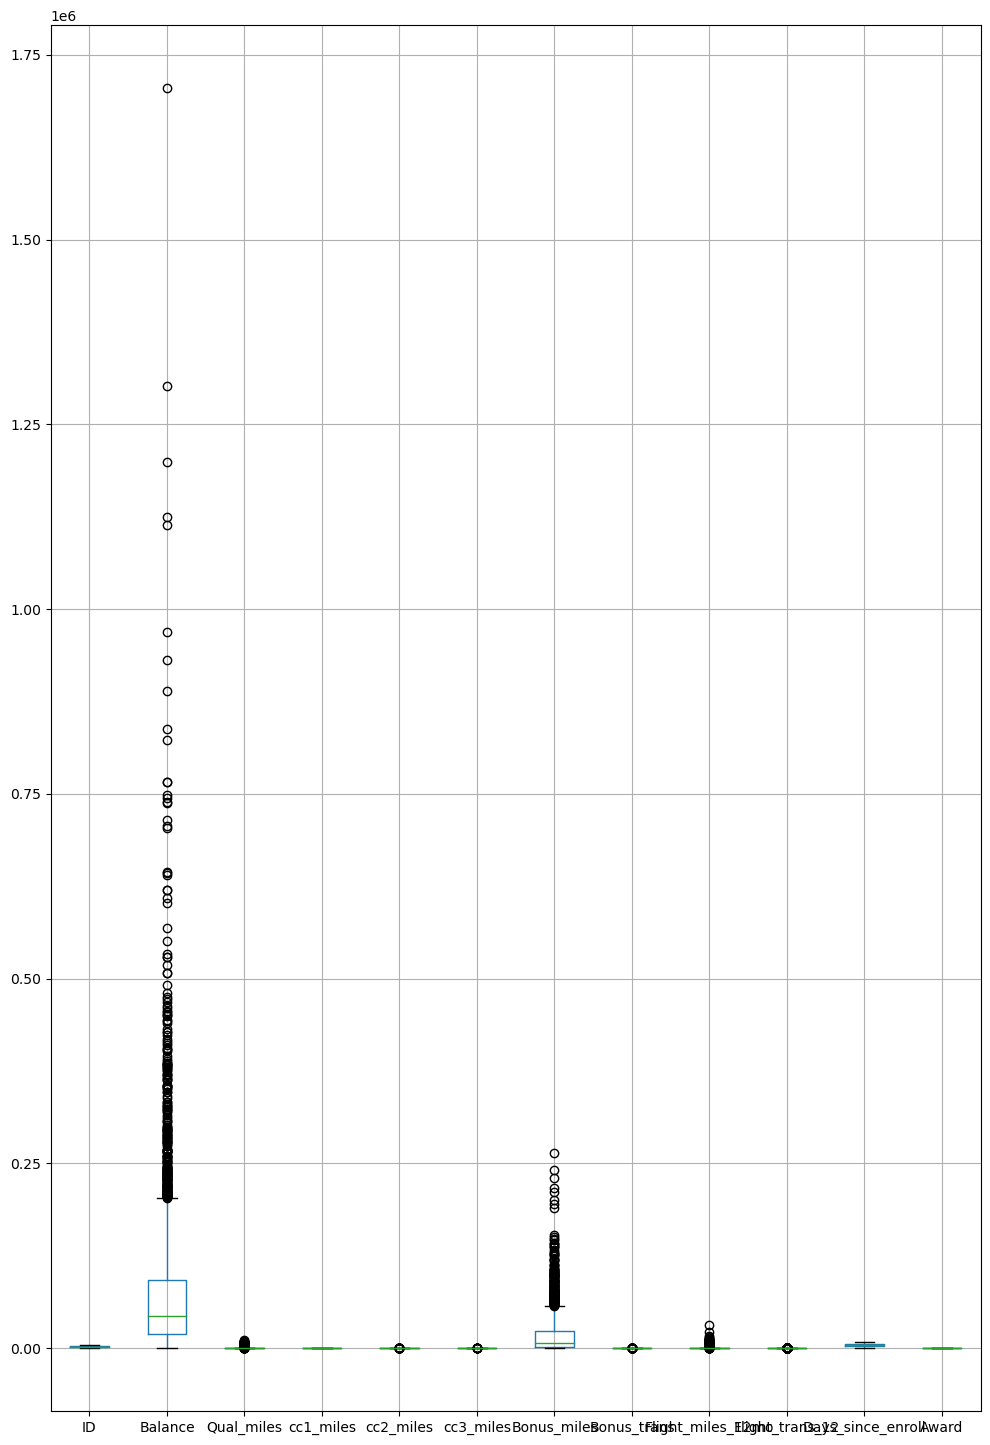

In [9]:
plt.figure(figsize=(12,18))
air.boxplot()
plt.show()

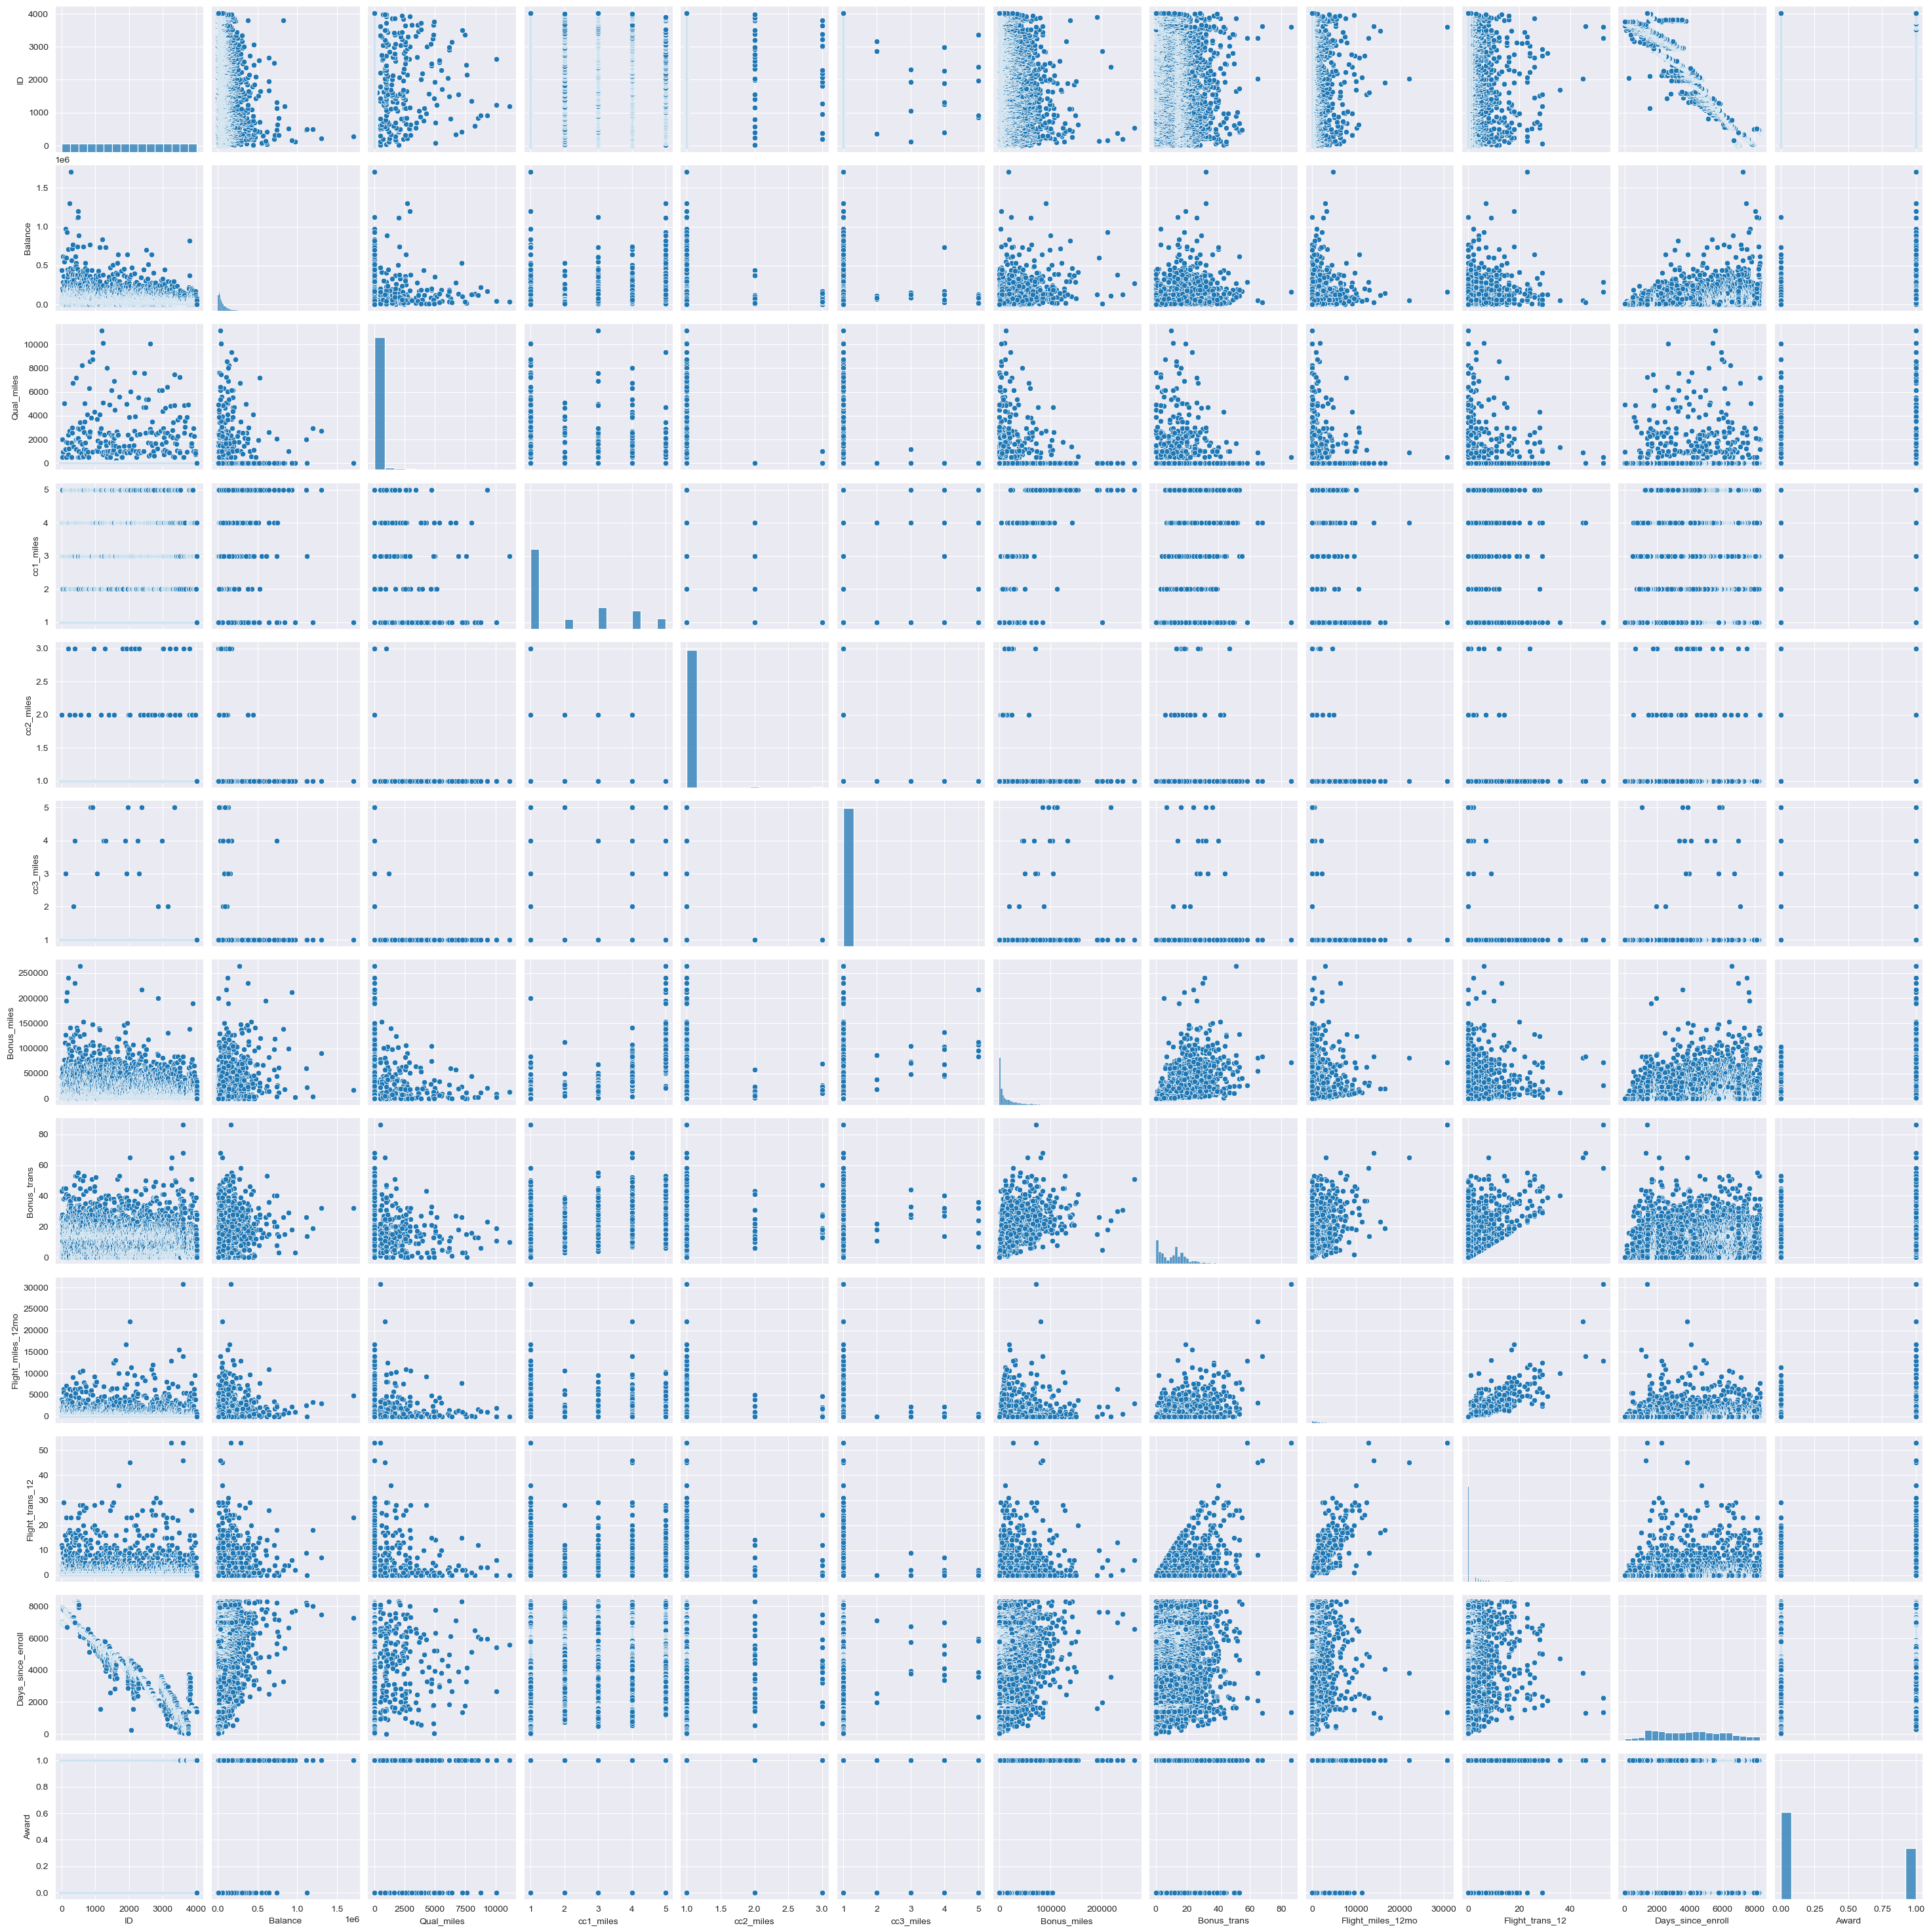

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(air)

In [11]:
### correlation analysis
air.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243540,-0.019305,-0.224243,0.020338,-0.014686,-0.202803,-0.146500,-0.030891,-0.051967,-0.964991,-0.177661
Balance,-0.243540,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,-0.019305,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,-0.224243,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,0.020338,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,-0.014686,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,-0.202803,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,-0.146500,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,-0.030891,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,-0.051967,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862


<Axes: >

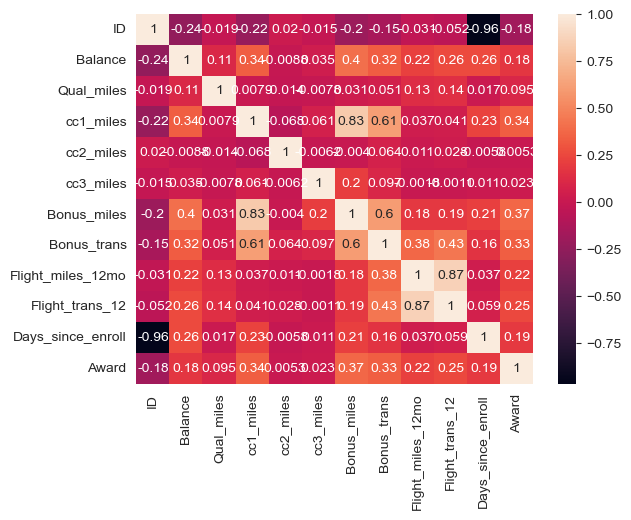

In [12]:
sns.heatmap(air.corr(),annot=True,xticklabels=True,yticklabels=True)

In [50]:
# normalizing the hetrogenous  data
from sklearn.preprocessing import MinMaxScaler
x=MinMaxScaler().fit_transform(air)
x

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 7.50000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 7.50000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 7.50000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00]])

# Hierarchial Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

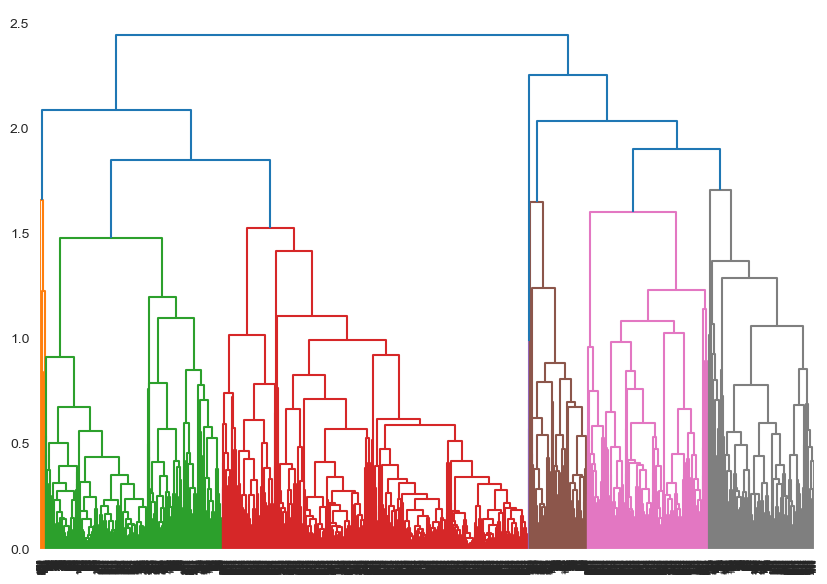

In [15]:
# dendrogram
from scipy.cluster import hierarchy
lk=hierarchy.linkage(x,method='complete')
plt.figure(figsize=(10, 7))
dend=hierarchy.dendrogram(lk)

In [16]:
hc=AgglomerativeClustering(n_clusters=5)
ypred=hc.fit_predict(x)
ypred

array([4, 4, 4, ..., 0, 2, 2], dtype=int64)

In [17]:
air['cluster HC']=ypred
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [18]:
air.groupby('cluster HC').agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster HC,,,,,,,,,,,,
0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0
1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0
2,3328.313023,31097.743130,108.387097,1.000000,1.000000,1.000000,2482.054958,5.667861,277.446834,0.770609,1784.790920,0.0
3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0
4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0


In [19]:
# passenger belongs to the cluster 0
air[air['cluster HC']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3977,33972,0,3,1,1,21029,29,0,0,1467,1,0
3972,3996,72297,0,3,1,1,16241,16,0,0,1587,1,0
3977,4001,10071,0,2,1,1,27701,16,0,0,1421,1,0
3978,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0


In [20]:
# passenger belongs to the cluster 1
air[air['cluster HC']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
10,11,40091,0,2,1,1,7278,10,0,0,6959,0,1
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,1
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,1
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,3995,35185,0,2,1,1,5957,7,0,0,1439,0,1
3973,3997,58387,0,3,1,1,14581,39,0,0,1435,0,1
3979,4003,28867,0,3,1,1,19169,28,0,0,1425,0,1
3984,4008,59017,0,4,1,1,34746,25,0,0,1418,0,1


In [21]:
# passenger belongs to the cluster 2
air[air['cluster HC']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,2
2041,2058,15148,0,1,1,1,15148,3,0,0,269,0,2
2058,2075,42342,0,1,1,1,11408,23,11408,23,4331,0,2
2153,2170,184301,0,1,1,1,6454,13,3954,12,4010,0,2
2179,2196,161579,0,1,1,1,7688,21,5688,20,3811,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,4013,11310,0,1,1,1,5021,2,0,0,1409,0,2
3991,4015,11181,0,1,1,1,929,12,0,0,1407,0,2
3992,4016,3974,0,1,1,1,365,3,0,0,1397,0,2
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [22]:
# passenger belongs to the cluster 3
air[air['cluster HC']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,3
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,3
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,3
36,37,23193,0,1,1,1,650,4,550,3,7861,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,3976,59927,739,1,1,1,3100,3,0,0,1464,1,3
3986,4010,11933,0,1,1,1,249,3,79,1,1412,1,3
3988,4012,2622,0,1,1,1,1625,6,0,0,1404,1,3
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3


In [23]:
# passenger belongs to the cluster 4
air[air['cluster HC']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,3390,23197,0,1,3,1,10587,13,150,1,1747,0,4
3487,3510,38292,0,1,2,1,12487,13,250,2,531,0,4
3611,3634,37300,0,1,3,1,23760,19,0,0,676,0,4
3779,3802,35850,0,1,3,1,17759,18,0,0,3439,0,4


<Axes: xlabel='cluster HC'>

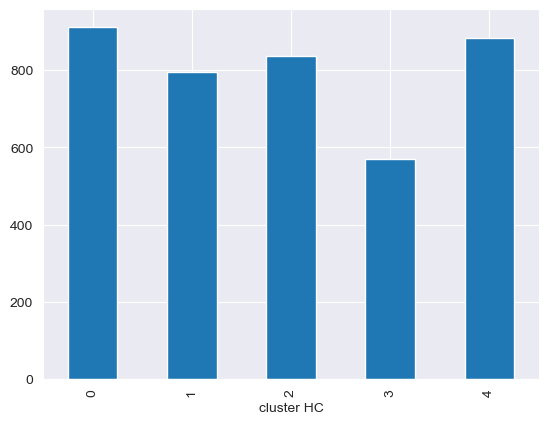

In [94]:
air.groupby(['cluster HC']).count()['Balance'].plot(kind='bar')

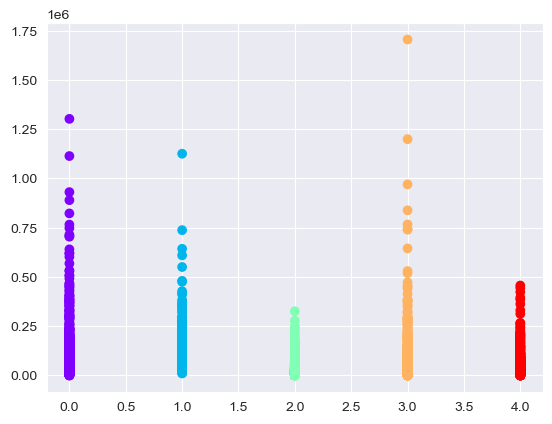

In [24]:
plt.scatter(x=air['cluster HC'],y=air['Balance'],c=ypred,cmap='rainbow')

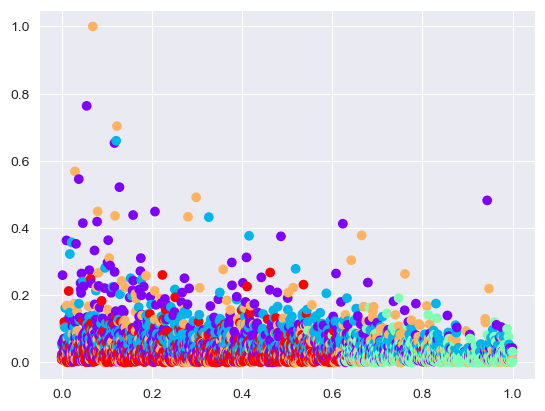

In [91]:
# visualizing the cluster
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='rainbow')

# KMEANS

In [25]:
from sklearn.cluster import KMeans

In [26]:
km=KMeans()

In [27]:
import warnings
warnings.filterwarnings('ignore')

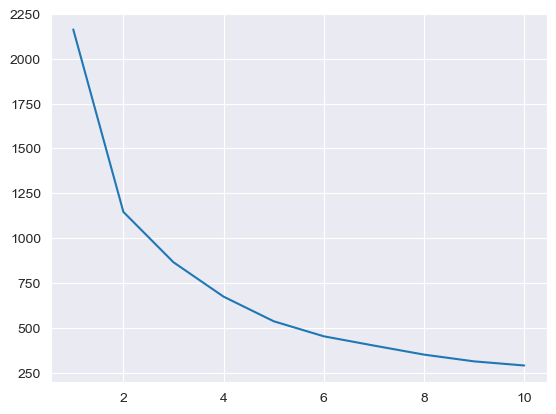

In [28]:
# elbow graph
wcss=[]

for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)    

In [29]:
# build cluster model with cluster number=5
km=KMeans(n_clusters=5)

In [30]:
ypred_km=km.fit_predict(x)
ypred_km

array([3, 3, 3, ..., 4, 0, 0])

In [31]:
air['cluster KM']=ypred_km
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,4
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,4
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [32]:
# analysing the cluster
air.groupby('cluster KM').agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC
cluster KM,,,,,,,,,,,,,
0,3219.090090,35416.616216,94.695495,1.204505,1.017117,1.006306,4404.872072,6.947748,214.481081,0.599099,1984.275676,0.0,2.082883
1,1379.641509,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0,0.000000
2,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,1.000000
3,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,3.646991
4,2063.952020,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0,2.155303


In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred_km)

0.41655213688489695

In [34]:
# model with cluster number=4
km1=KMeans(n_clusters=4)

In [36]:
ypred_km1=km1.fit_predict(x)
ypred_km1

array([1, 1, 1, ..., 3, 2, 2])

In [37]:
silhouette_score(x,ypred_km1)
#has less score than the model with cluster number=5, so the optimum number of cluster is 5 for KMean model

0.38545810540537717

<Axes: xlabel='cluster KM'>

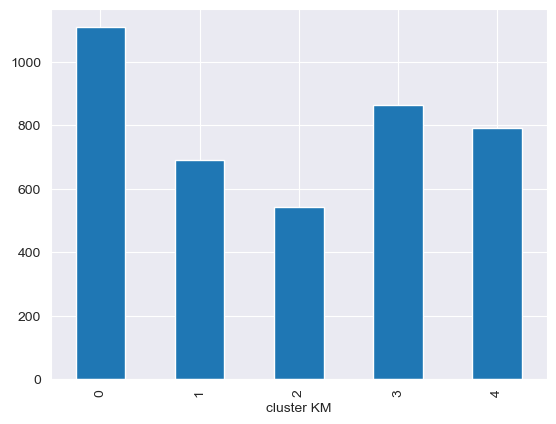

In [38]:
air.groupby(['cluster KM']).count()['Balance'].plot(kind='bar')

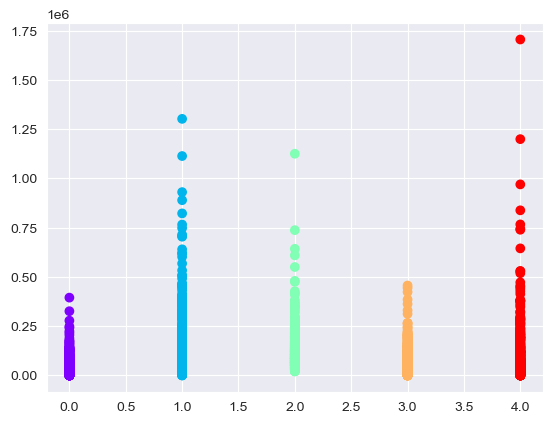

In [40]:
plt.scatter(air['cluster KM'],air['Balance'],c=ypred_km,cmap='rainbow')

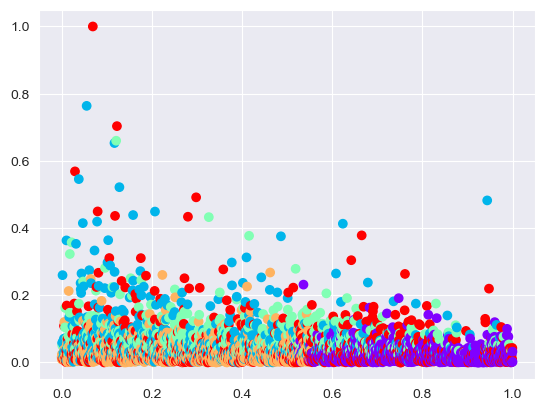

In [90]:
# visualizing the cluster
plt.scatter(x[:,0],x[:,1],c=ypred_km,cmap='rainbow')

In [41]:
## passenger belongs to the cluster 0
air[air['cluster KM']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
1950,1967,15676,0,1,1,1,0,0,0,0,3178,0,4,0
1952,1969,40675,0,1,1,1,1413,9,0,0,2895,0,4,0
2041,2058,15148,0,1,1,1,15148,3,0,0,269,0,2,0
2067,2084,89708,0,1,1,1,8000,4,0,0,3173,0,4,0
2102,2119,59913,0,1,1,1,2210,5,150,1,3481,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1,0
3991,4015,11181,0,1,1,1,929,12,0,0,1407,0,2,0
3992,4016,3974,0,1,1,1,365,3,0,0,1397,0,2,0
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [42]:
## passenger belongs to the cluster 1
air[air['cluster KM']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,0,1
3880,3904,32424,0,4,1,1,39635,16,0,0,1584,1,0,1
3882,3906,126167,0,5,1,1,190160,15,0,0,1612,1,0,1
3907,3931,57642,0,4,1,1,52176,15,0,0,1564,1,0,1


In [43]:
## passenger belongs to the cluster 2
air[air['cluster KM']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,1,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,1,2
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,1,2
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,3909,84979,0,4,1,1,36702,16,0,0,1600,0,1,2
3898,3922,90666,0,4,1,1,32474,14,0,0,1582,0,1,2
3916,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,1,2
3965,3989,91605,0,4,1,1,37840,18,0,0,1444,0,1,2


In [44]:
## passenger belongs to the cluster 3
air[air['cluster KM']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,1,3
2190,2207,61617,0,2,1,1,23495,13,0,0,3972,0,1,3
2192,2209,112891,0,1,1,1,500,1,500,1,3909,0,4,3
2200,2217,12271,500,2,1,1,7684,15,1000,2,4219,0,1,3


In [45]:
## passenger belongs to the cluster 4
air[air['cluster KM']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,3,4
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,3,4
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3,4
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,3,4
36,37,23193,0,1,1,1,650,4,550,3,7861,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,4010,11933,0,1,1,1,249,3,79,1,1412,1,3,4
3988,4012,2622,0,1,1,1,1625,6,0,0,1404,1,3,4
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,4
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,4


# DBSCAN

In [46]:
from sklearn.cluster import DBSCAN

In [51]:
# need  to find the  optimal values for 'eps' and 'min_value'
from sklearn.neighbors import NearestNeighbors

In [68]:
nn=NearestNeighbors(n_neighbors=3).fit(x)

In [69]:
d,i=nn.kneighbors(x)

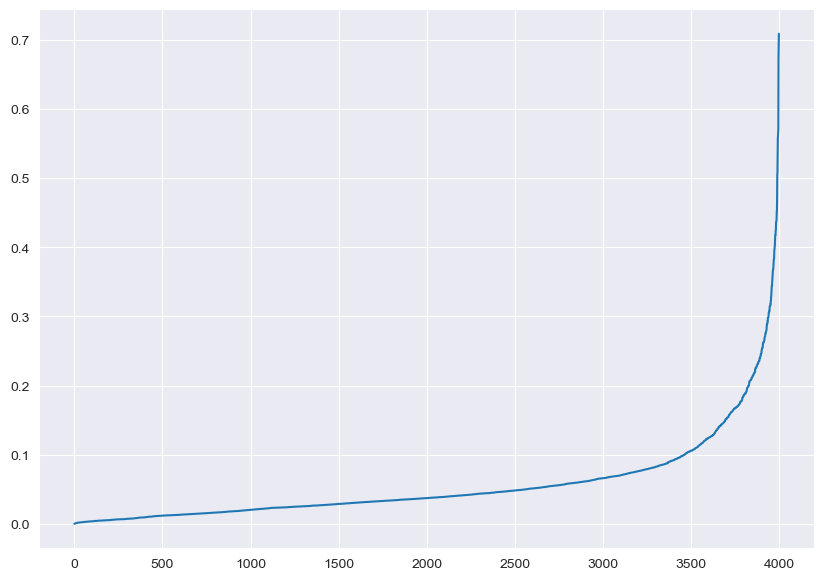

In [70]:
distance=np.sort(d[:,1])
plt.figure(figsize=(10,7))
plt.plot(distance)

In [77]:
db=DBSCAN(eps=1,min_samples=4)

In [78]:
ypred_db=db.fit_predict(x)

In [79]:
ypred_db

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [81]:
air['cluster DB']=ypred_db
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM,cluster DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,4,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,4,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,0


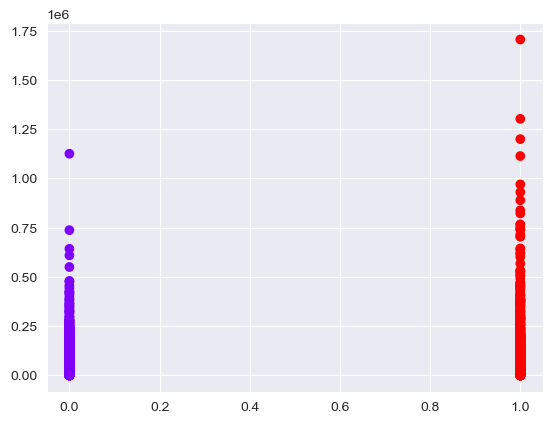

In [83]:
plt.scatter(air['cluster DB'],air['Balance'],c=ypred_db,cmap='rainbow')

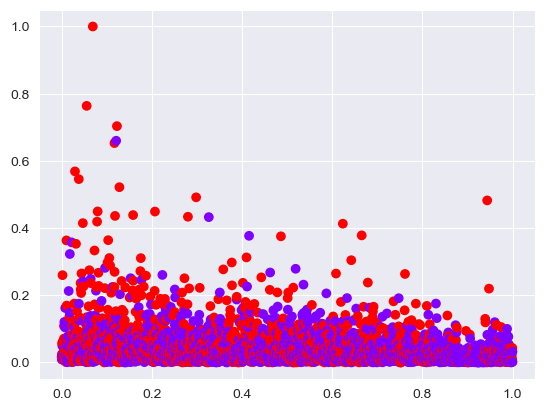

In [86]:
# visualizing the cluster
plt.scatter(x[:,0],x[:,1],c=ypred_db,cmap='rainbow')

<Axes: xlabel='cluster DB'>

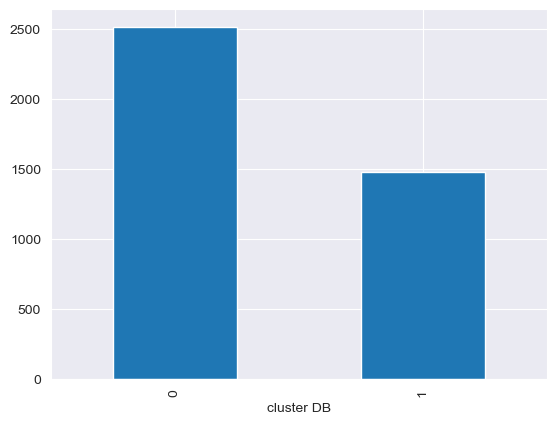

In [96]:
air.groupby(['cluster DB']).count()['Balance'].plot(kind='bar')

In [87]:
# analyzing the cluster model
air.groupby(['cluster DB']).agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM
cluster DB,,,,,,,,,,,,,,
0,2172.483512,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0,2.386174,1.461263
1,1745.592843,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.152600,2.604321


In [88]:
# passenger belongs to cluster 0
air[air['cluster DB']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM,cluster DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,3,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1,0,0
3991,4015,11181,0,1,1,1,929,12,0,0,1407,0,2,0,0
3992,4016,3974,0,1,1,1,365,3,0,0,1397,0,2,0,0
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,0


In [89]:
# passeneger belongs  to cluster 1
air[air['cluster DB']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster HC,cluster KM,cluster DB
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,3,4,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,4010,11933,0,1,1,1,249,3,79,1,1412,1,3,4,1
3988,4012,2622,0,1,1,1,1625,6,0,0,1404,1,3,4,1
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,4,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,4,1


In [92]:
silhouette_score(x,ypred_db)

0.38529560053379114

In [97]:
silhouette_score(x,ypred)

0.4920575920914068

In [98]:
silhouette_score(x,ypred_km)

0.5258260133644327

In [ ]:
# so the optimum number of cluster for the model is 5 and the value is nearest to 1 so consider it as average score